# Жиделев Сергей Николаевич
# РИ-401002, Вариант 6

In [49]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
table = pd.read_excel('Data/for_lab3.xlsx')
variant = 6
Y = np.array(table.values[variant-1][1:])
print(Y)

[12.6  18.92 17.08 15.51  8.97 14.52 12.77 12.96  5.55 11.09  9.23  5.03
  2.15  8.95  8.04  5.68  0.14  5.85  4.21  2.56  0.08  3.87  1.1   0.85]


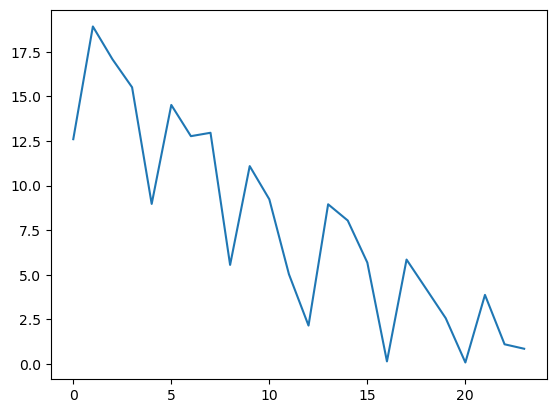

In [52]:
plt.plot(Y)

In [53]:
X = np.ones((len(Y), 2))
X[:, 1] = np.linspace(0.1, 10, len(Y))

7 задание

In [54]:
B = np.linalg.lstsq(X, Y)


8 задание

[15.97016465 -1.61364646]


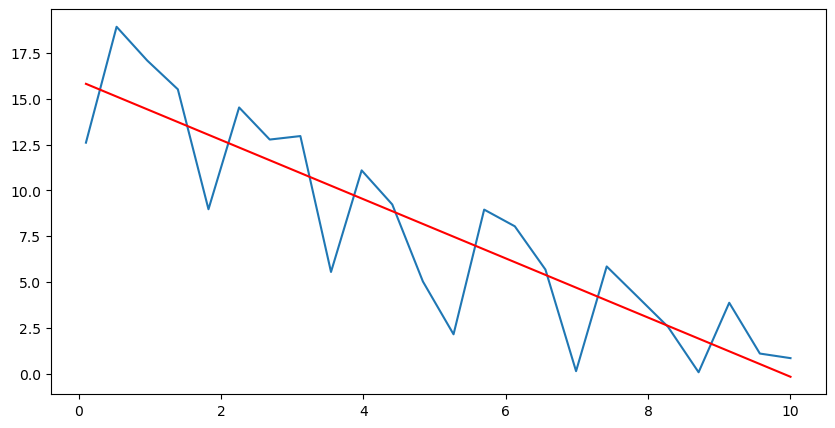

In [55]:
t = X[:, 1]
B = B[0] # забираем из результата коэффициенты β
print(B)
plt.figure(figsize = (10, 5))
plt.plot(t, Y) # строим исходный ВР
plt.plot(t, B[0] + B[1] * t , 'r') # строим его тренд
plt.show()


10 задание

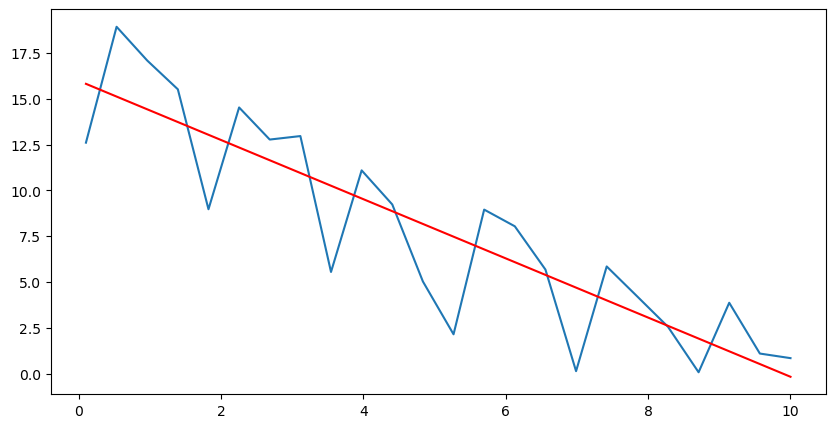

In [56]:
bb = np.polyfit(t, Y, 1) # полиномиальная кривая 1-го порядка
plt.figure(figsize = (10, 5))
plt.plot(t, Y)
plt.plot(t, bb[1] + bb[0]*t, 'r') # Внимание! Коэф. β в другом порядке
plt.show()


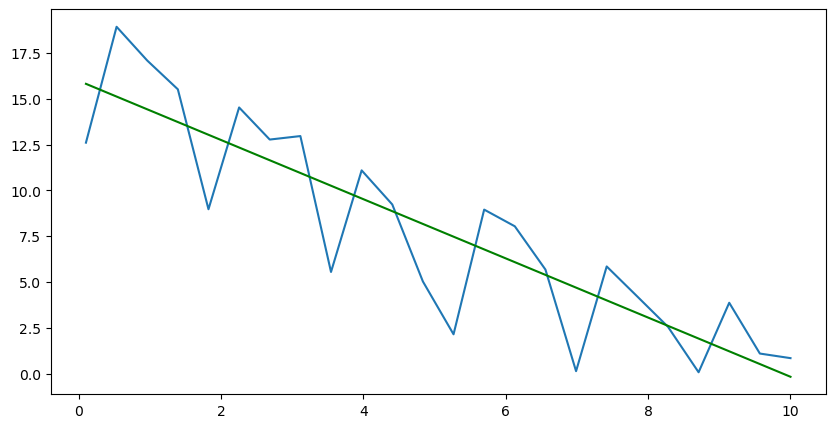

In [57]:
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Y)
# считаем значения полинома на заданной временной сетке
plt.plot(t, p(t), 'g')
plt.show()

11 заданиe

LinregressResult(slope=-1.6136464646464648, intercept=15.970164646464646, rvalue=-0.8750386453833795, pvalue=2.2183412022197977e-08, stderr=0.19031051761964682, intercept_stderr=1.1158789875471273)


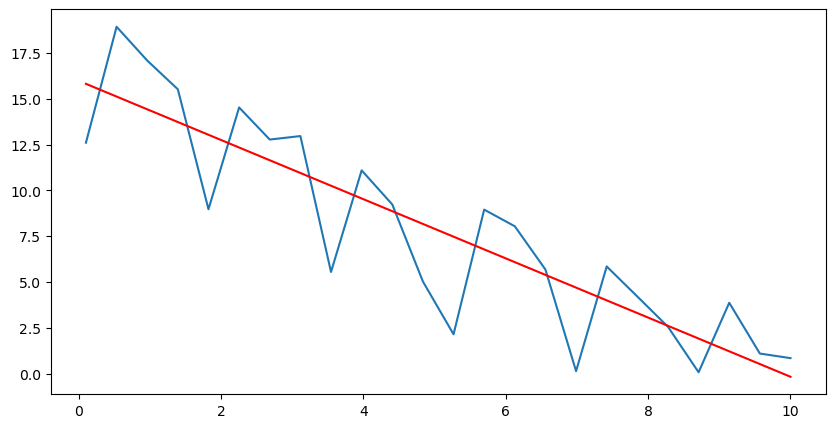

In [58]:
out = stats.linregress(t, Y)
print(out) # выведет все коэффициенты и статистику регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Y) # строим график кривой вместе с трендом
plt.plot(t, out.intercept + out.slope*t, 'r')
plt.show()

12 задание

[15.97016463 -1.61364646]
[[ 1.24518591 -0.18290137]
 [-0.18290137  0.03621809]]


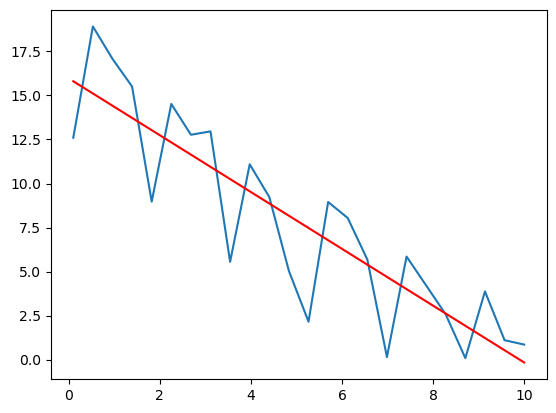

In [59]:
def func(t, b0, b1): # описываем функцию тренда
    return b0 + b1 * t # линейный тренд с 2 параметрами
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, t, Y) # проводим подгонку МНК

plt.plot(t, Y)
plt.plot(t, popt[1]*t + popt[0], c = 'red')

print(popt) # получаем коэффициенты b0 & b1
print(pcov) # ковариационная матрица ошибок подгонки


In [60]:
popt

array([15.97016463, -1.61364646])

13-14 задание

[-1.61364646]
15.970164646464648
0.7656926309143801


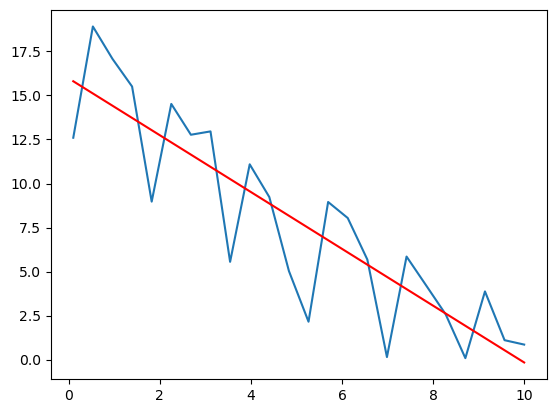

In [61]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t.reshape(-1,1), Y)

print(reg.coef_) # здесь выведется линейный коэффициент b1
print(reg.intercept_) # здесь выведется коэффициент b0 (смещение)
print(reg.score(t.reshape(-1,1), Y))
# здесь будет выведена «оценка» (равная R^2) полученной регрессии

plt.plot(t, Y)
plt.plot(t, reg.coef_*t + reg.intercept_, c = 'red')

In [62]:
import statsmodels.api as sm
x_ = sm.add_constant(t.reshape(-1,1))
smm = sm.OLS(Y, x_) # используем Метод Наименьших Квадратов
# (МНК) (Ordinary Least Squares = OLS)
res = smm.fit() # подгоняем параметры модели по МНК
print(res.params) # получаем результирующие коэффициенты

[15.97016465 -1.61364646]


16 задание

In [63]:
def Polinom(t, Y, n):
    bb = np.polyfit(t, Y, n) # полиномиальная кривая i-го порядка
    k = 0
    arr = np.array(np.zeros(len(Y)))
    for i in bb:
        arr += i * np.power(t, len(bb) - 1 - k)
        k += 1

    plt.plot(t, Y)
    plt.plot(t, arr)
    plt.title(f'Тренд {n}-й степени')
    plt.show()
    

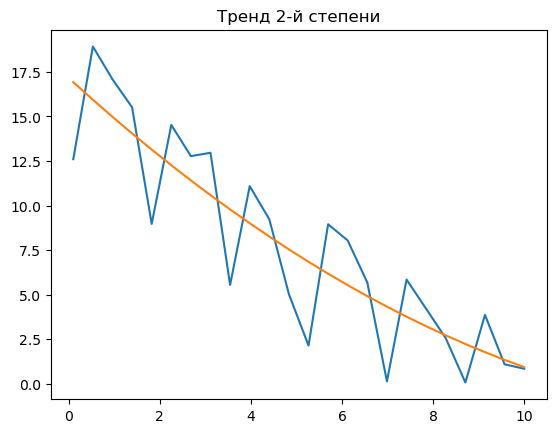

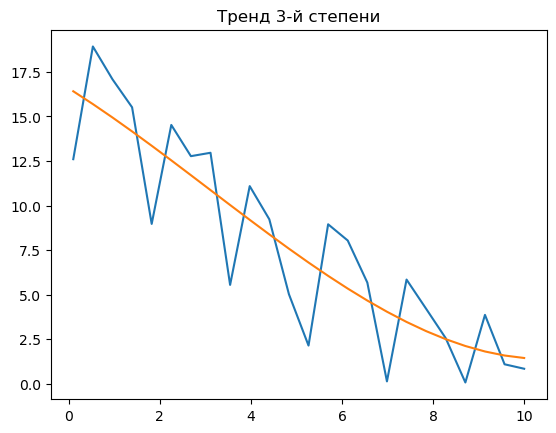

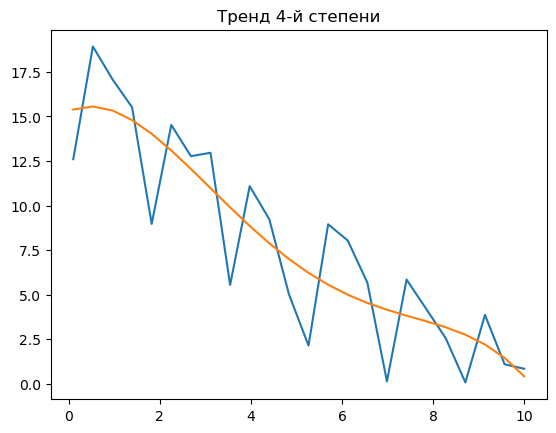

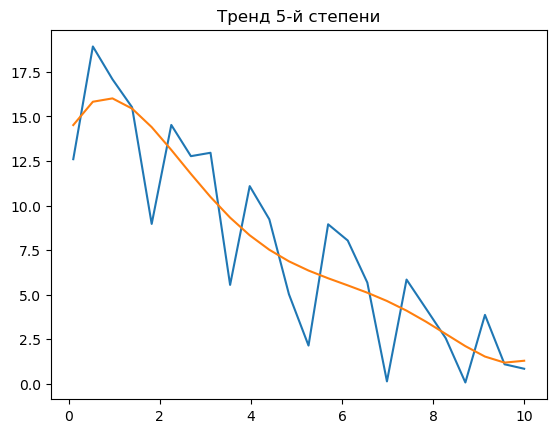

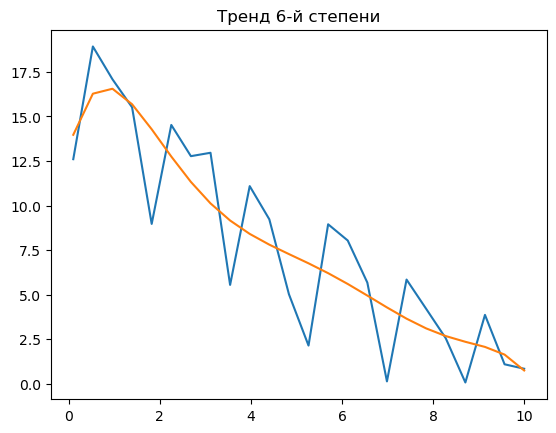

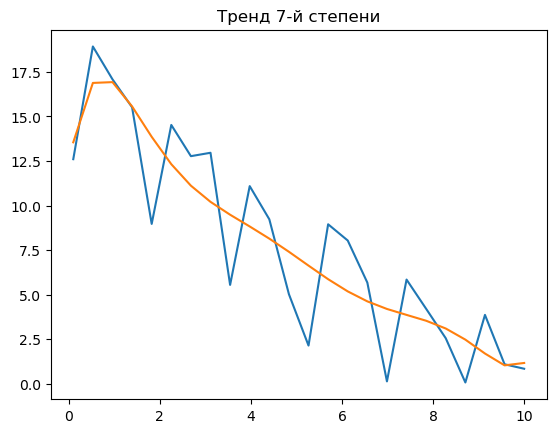

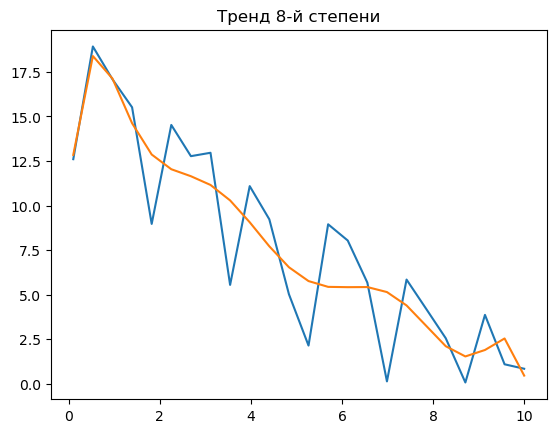

In [64]:
for i in range(2, 9):
    Polinom(t, Y, i)

17 задание

In [65]:
def f(t, b0, b1):
    return b0 * np.exp(b1 * t)
    
def f1(t, b0, b1, b2):
    return b0 * np.exp(b1 * t) + b2
    
popt3, pcov3 = curve_fit(f, t, Y)
popt4, pcov4 = curve_fit(f1, t, Y, maxfev=3000)

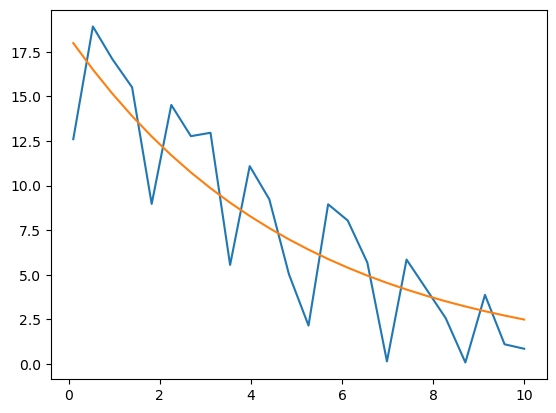

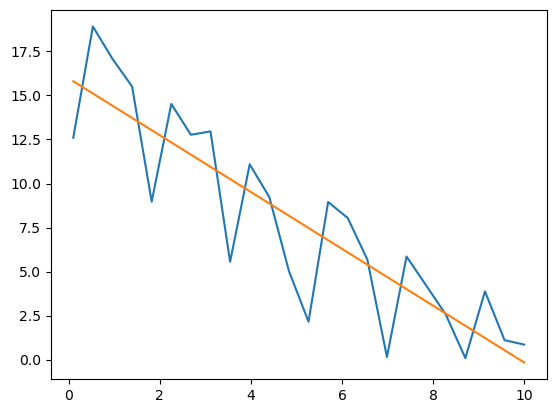

In [66]:
plt.plot(t, Y)
plt.plot(t, f(t, popt3[0], popt3[1]))
plt.show()

plt.plot(t, Y)
plt.plot(t, f1(t, popt4[0], popt4[1], popt4[2]))
plt.show()

18 задание

In [67]:
X = np.ones((len(Y), 2))
X[:, 1] = f(t, popt[0], popt[1])
B = np.linalg.lstsq(X, Y)

In [68]:
B

(array([6.82362752, 0.88213436]),
 array([556.99642266]),
 2,
 array([15.78921121,  4.5530391 ]))

#### При использовании МНК для решения экспоненциального тренда, мы должны линеаризовать модель, чтобы привести её к форме, где можно использовать линейную регрессию. Проблемы, к которым это может привести: если данные при прогнозировании не соответствуют именно экспоненциальной зависимости. Кроме того, ошибка при прогнозированиях может аккумулироваться, из-за чего становится сложно оптимизировать коэффициенты.

19 задание

In [69]:
def log1(x, b0, b1, b2):
    return b0 * np.log10(b1*x) + b2

popt, pcov = curve_fit(log1, t, Y)

In [70]:
popt

array([-8.95269329,  3.25200417, 17.38719664])

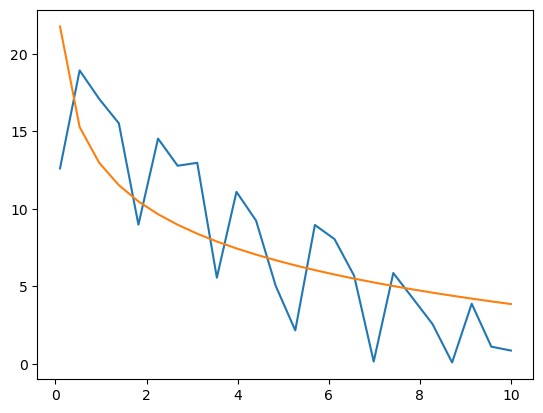

In [71]:
plt.plot(t, Y)
plt.plot(t, log1(t, *popt))

21 задание

In [72]:
def smooth(x, window_len):
    if window_len<3:
        return x
    s=np.r_[2*x[0]-x[window_len-1::-1], x, 2*x[-1]-x[-1:-window_len:-1]]
    w=np.ones(window_len, 'd')
    y=np.convolve(w/w.sum(), s, mode='same')
    return y[window_len:-window_len+1]


In [73]:
Smoothed_data = smooth(Y, 3)
print(Smoothed_data)

[14.70666667 16.2        17.17       13.85333333 13.         12.08666667
 13.41666667 10.42666667  9.86666667  8.62333333  8.45        5.47
  5.37666667  6.38        7.55666667  4.62        3.89        3.4
  4.20666667  2.28333333  2.17        1.68333333  1.94        0.93333333]


23 задание

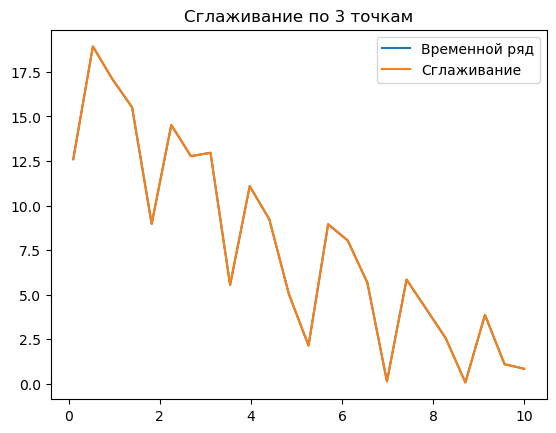

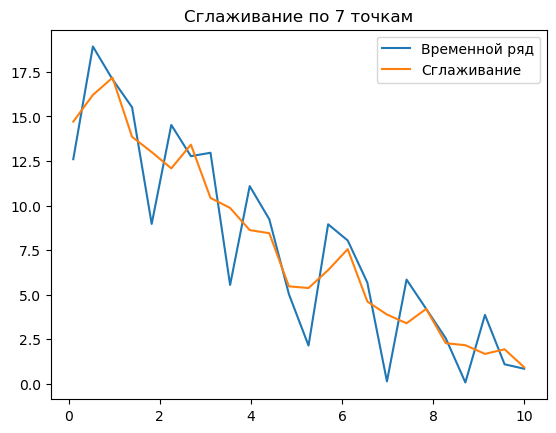

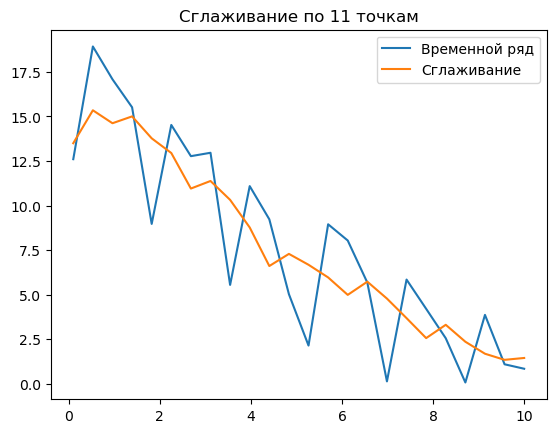

In [74]:
for i in (1, 3, 5):
    Sm = smooth(Y, i)
    plt.plot(t, Y)
    plt.plot(t, Sm)
    plt.title(f'Сглаживание по {2 * i + 1} точкам')
    plt.legend (('Временной ряд', 'Сглаживание'))
    plt.show()

24 задание

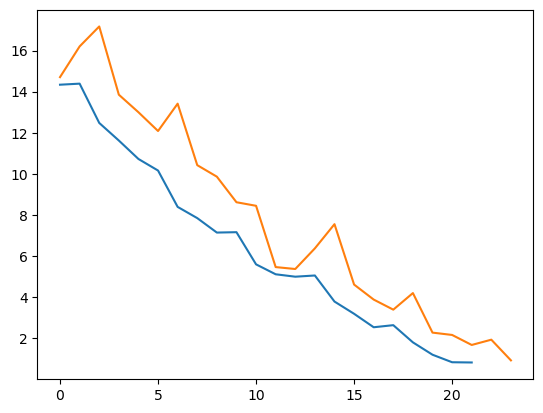

In [75]:
# import pandas as pd
# df = pd.DataFrame({"col1": Y.copy()})

# for i in range(6):
#     df.loc[ len(df.index )] = 0
    
# for i in range(24, 30):
#     df.loc[i] = df.mean()


def moving_average(lst, k):
    lst_avg = []
    for i in range(len(lst) - k + 1):
        lst_avg.append(sum(lst[i:i+7]) / 7)
    return lst_avg

plt.plot(moving_average(Y, 3))
plt.plot(smooth(Y, 3))

В данном случае на графике отчётливо видно, что функция скользящего среднего, которая была реализована по формуле из лекции, имеет более плавный вид сглаживания, чем та, что была дана в задании 21.

25 задание

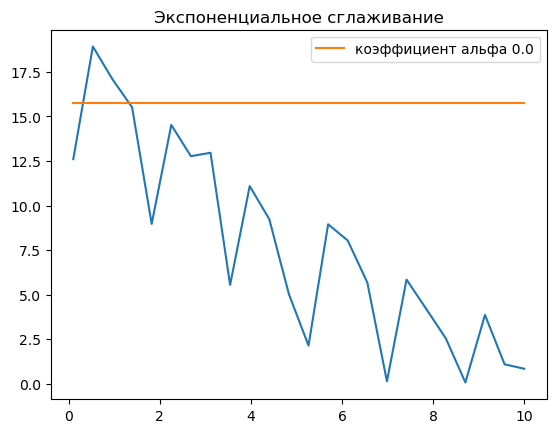

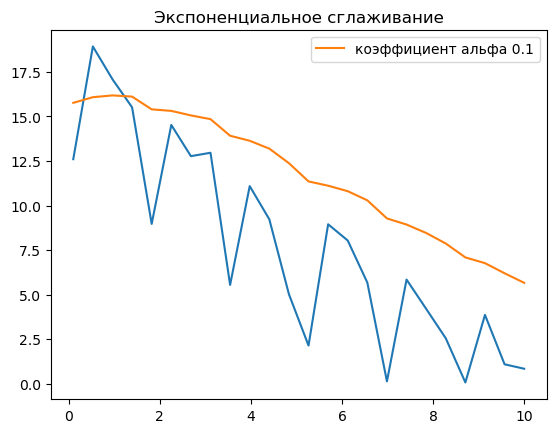

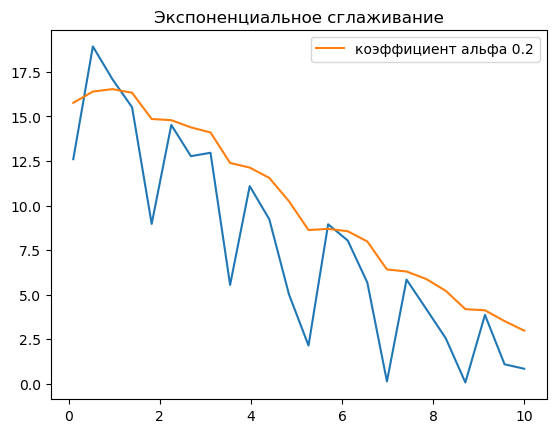

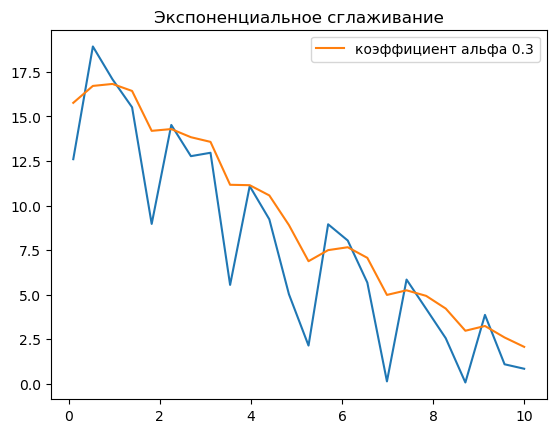

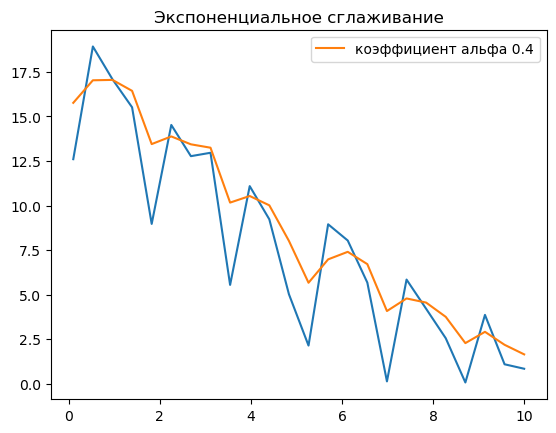

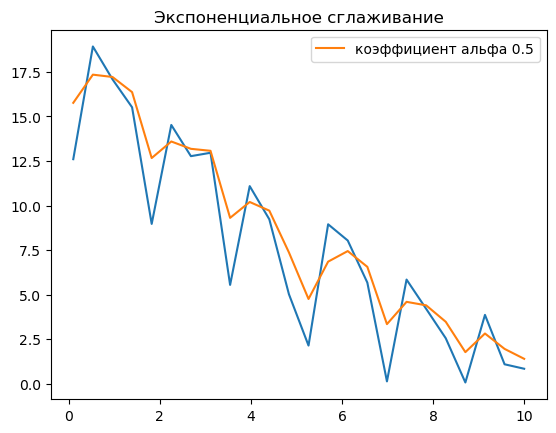

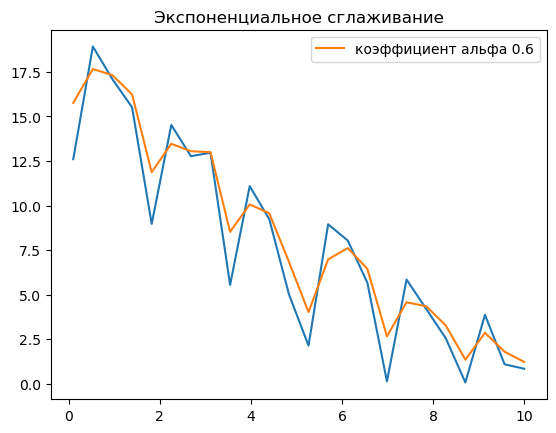

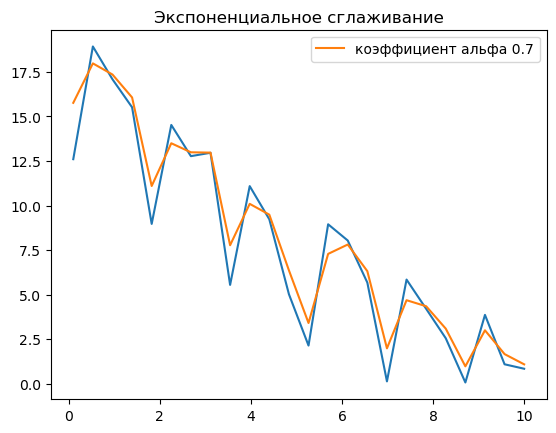

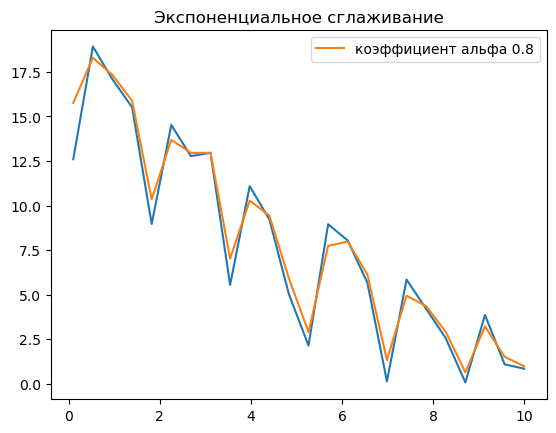

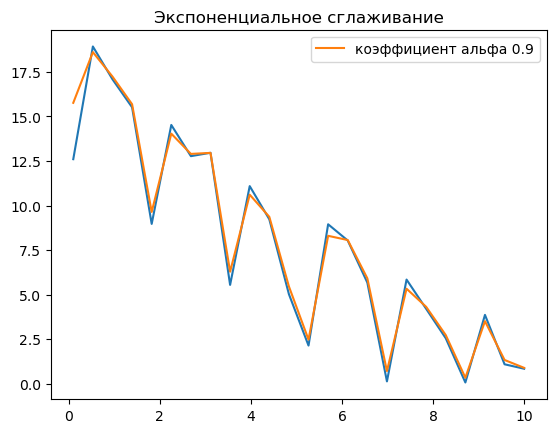

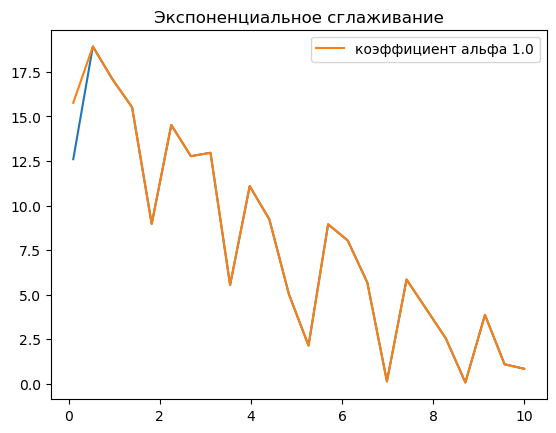

In [76]:
def exp_smooth(x, a):
    w = [np.mean(x[0:2])]
    for i in range(1, len(x)):
        w.append((1 - a) * w[-1] + a * x[i])
    return w

for i in range(0, 11):
    plt.plot(t, Y)
    plt.plot(t, exp_smooth(Y, i/10), label = f'коэффициент альфа {i/10}')
    plt.title('Экспоненциальное сглаживание')
    plt.legend()
    plt.show()

По графикам легко заметить, что чем ближе коэффициент А к 0, тем получается более сглаженный тренд, за исключением самой точки 0, а чем ближе коэффициент к 1, тем эффект от сглаживания меньше, то есть данный коэффициент на прямую влияет на степень сглаживания тренда.